# Study MESA models of zeta Ophiuchi

author: Mathieu Renzo, mrenzo@flatironinstitute.org

In [1]:
import sys
# the line below import stuff from git@github.com:mathren90/plotFunc.git
sys.path.append('/mnt/home/mrenzo/codes/python_stuff/plotFunc/')
from MESAreader import *
import matplotlib.pyplot as plt
from plotDefaults import *


In [2]:
set_plotDefaults()

done in plotDefaults.py


# zeta Ophiuchi's

https://ui.adsabs.harvard.edu/abs/2014ApJS..211...10S/abstract

In [ ]:
# from https://ui.adsabs.harvard.edu/abs/2001MNRAS.327..353H/abstract
# Spectral type: O9.5V

omega_div_omega_crit_obs = 0.9
err_omega_div_omega_crit_obs = 0.03

log_g_pole = 3.99
err_log_g_pole = 0.05

y = 0.2
err_y = 0.03

Tp = 39000 # kelvin
err_Tp = 1000

Teff = 34300 # kelvin

log_L = 4.96 

vsini = 400 #km/s
err_vsini = 50 # estimated from spread in the literature


i = 70 # degrees
err_i = 10

v_eq = 425 #km/s

In [17]:
root = "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/fiducial/"
binary = root+"/binary_to_donor_TAMS/LOGS2/"
accretor_to_TAMS_from_model = root+"/accretor_to_TAMS/from_model/LOGS/"
# accretor_to_TAMS_from_photo = root+"/accretor_to_TAMS/from_photo/LOGS/"
single_star_root = root+"/single_star_comparison/"

Text(0, 0.5, '$\\log_{10}(L/L_\\odot)$')

/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  func(*args, **kwargs)


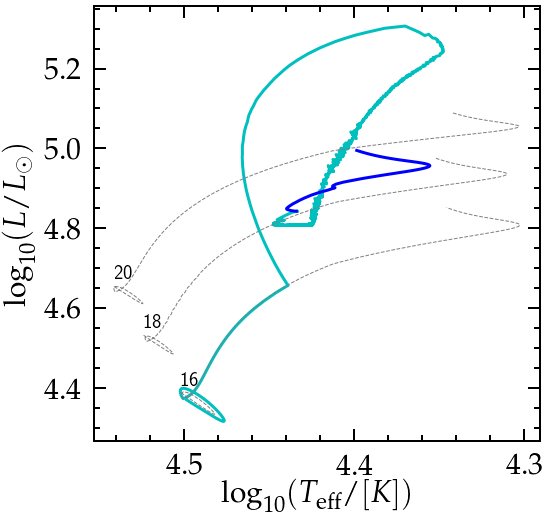

In [29]:
# HRD
def getlogLlogTeff(hfile):
    src, col = getSrcCol(hfile)
    log_Teff = src[:, col.index("log_Teff")]
    logL = src[:, col.index("log_L")]
    return logL, log_Teff


fig = plt.figure()
gs = gridspec.GridSpec(100, 100)
ax = fig.add_subplot(gs[:,:])

hfile1 = binary+'/history.data'
logL, logTeff = getlogLlogTeff(hfile1)
ax.plot(logTeff, logL, c='c')

hfile2 = accretor_to_TAMS_from_model+'/history.data'
logL, logTeff = getlogLlogTeff(hfile2)
ax.plot(logTeff, logL, c='b')

# the HRD tracks are the same starting from model or photo
# hfile2 = accretor_to_TAMS_from_photo+'/history.data'
# logL, logTeff = getlogLlogTeff(hfile2)
# ax.plot(logTeff, logL, c='r', ls='--')

for single_star in glob.glob(single_star_root+'/*/'):
    hsingle = single_star+'/LOGS/history.data'
    logL, logTeff = getlogLlogTeff(hsingle)
    ax.plot(logTeff, logL, c='#808080',lw=1, ls='--')
    mass = single_star.split('/')[-2]
    ax.text(logTeff[0], logL[0]+0.02, mass, fontsize=20)

    
ax.invert_xaxis()
ax.set_xlabel(r"$\log_{10}(T_\mathrm{eff}/ [K])$")
ax.set_ylabel(r"$\log_{10}(L/L_\odot)$")




Text(0, 0.5, '$\\log_{10}(g/\\mathrm{cm\\ s^{-2}})$')

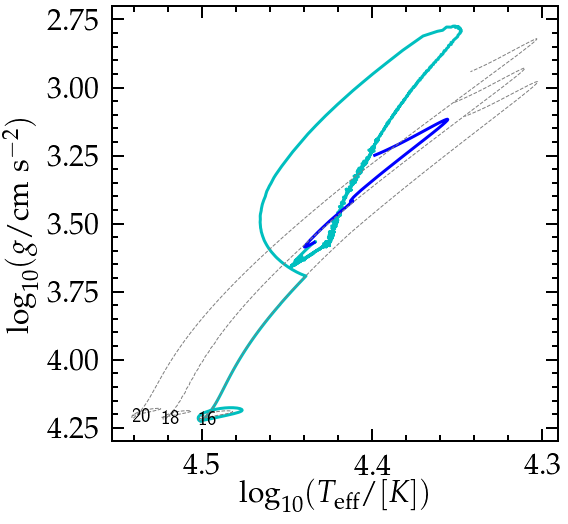

In [30]:
# spectroscopic HRD
def getlogglogTeff(hfile):
    src, col = getSrcCol(hfile)
    log_Teff = src[:, col.index("log_Teff")]
    log_g = src[:, col.index("log_g")]
    return log_g, log_Teff

fig = plt.figure()
gs = gridspec.GridSpec(100, 100)
ax = fig.add_subplot(gs[:,:])

hfile1 = binary+'/history.data'
logg, logTeff = getlogglogTeff(hfile1)
ax.plot(logTeff, logg, c='c')

hfile2 = accretor_to_TAMS_from_model+'/history.data'
logg, logTeff = getlogglogTeff(hfile2)
ax.plot(logTeff, logg, c='b')

# the HRD tracks are the same starting from model or photo
# hfile2 = accretor_to_TAMS_from_photo+'/history.data'
# logg, logTeff = getlogglogTeff(hfile2)
# ax.plot(logTeff, logg, c='r', ls='--')

for single_star in glob.glob(single_star_root+'/*/'):
    hsingle = single_star+'/LOGS/history.data'
    logg, logTeff = getlogglogTeff(hsingle)
    ax.plot(logTeff, logg, c='#808080',lw=1, ls='--')
    mass = single_star.split('/')[-2]
    ax.text(logTeff[0], logg[0]+0.02, mass, fontsize=20)

    
ax.invert_xaxis()
ax.invert_yaxis()    
ax.set_xlabel(r"$\log_{10}(T_\mathrm{eff}/ [K])$")
ax.set_ylabel(r"$\log_{10}(g/\mathrm{cm\ s^{-2}})$")

/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  func(*args, **kwargs)


/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  fig.canvas.print_figure(bytes_io, **kw)


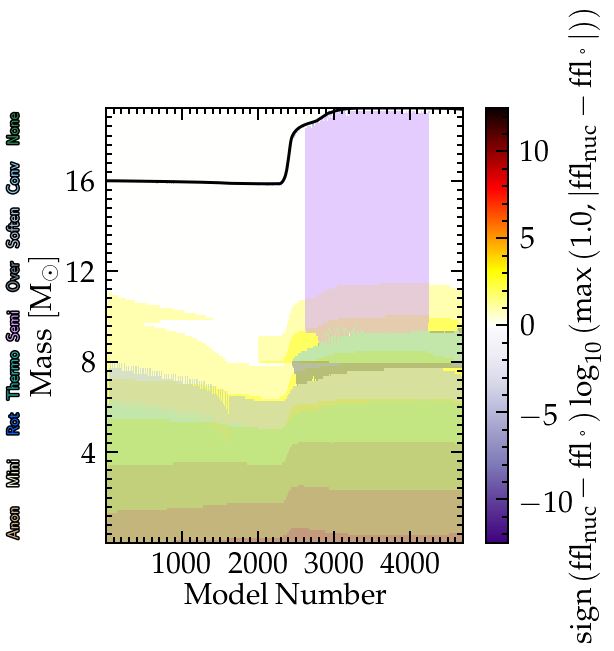

In [33]:
# Kippenhahn diagram
def Kippenhahn_combined(binary, accretor_to_TAMS, figname=""):
    fig = plt.figure()
    gs = gridspec.GridSpec(100, 100)
    ax = fig.add_subplot(gs[:,:])

    x = 'model_number' # 'star_age'
    y = 'mass'

    mmm.loadHistory(f=binary)
    ppp.plotKip3(mmm, fig=fig, ax=ax,
                 xaxis=x,
                 # yaxis="radius",
                 reloadHistory=False,
                 show_mass_loc=False,
                 show_mix_labels=True,
                 show=False,
                 mix_alpha=0.5,# mix_hatch='//', hatch_color='#98ef56', 
                 age_lookback=True,
                 age_log=True,
                 zone_frac = 10, #0.2,
                 cmin=-12.45, cmax=12.5)


Kippenhahn_combined(binary, accretor_to_TAMS_from_model)
    